In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/lifestyle-and-health-risk-prediction/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')

In [3]:
df.shape

(5000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [5]:
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [6]:
df.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

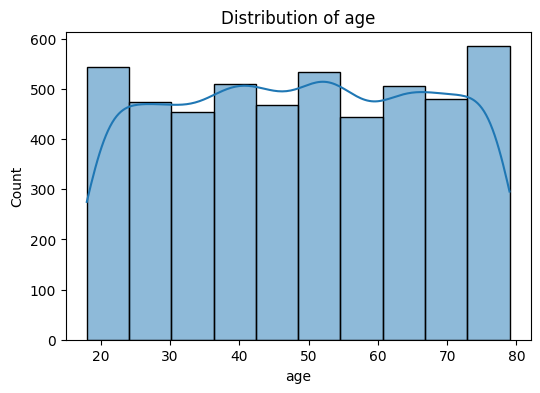

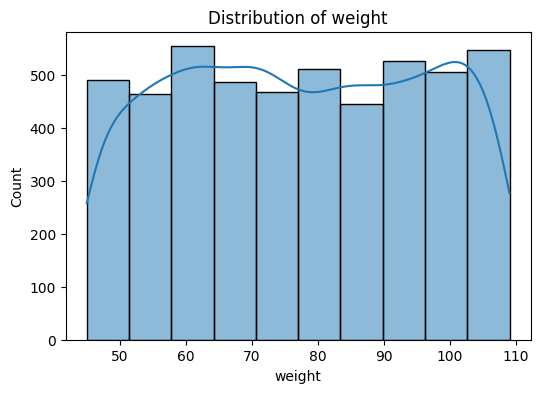

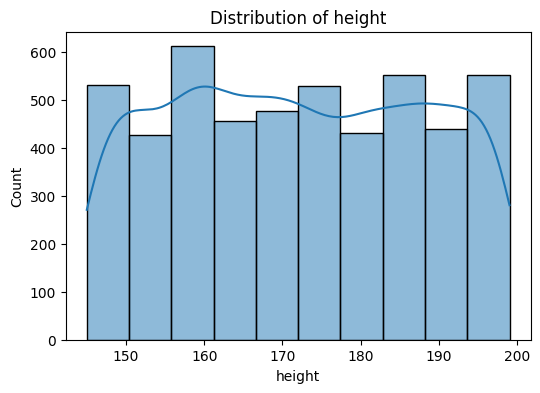

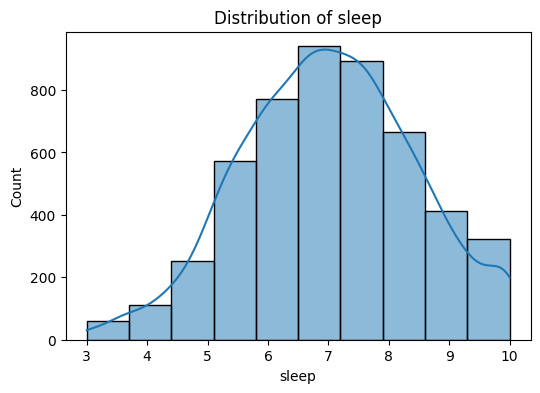

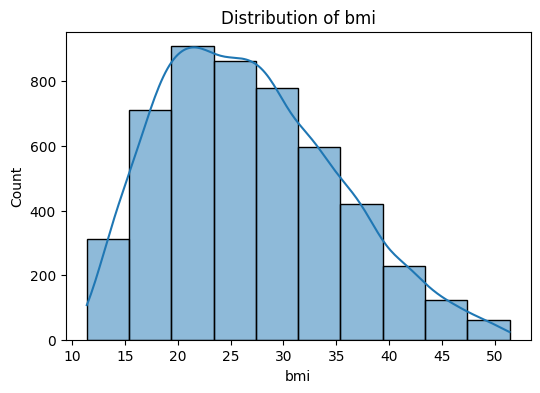

In [8]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
unique_values = pd.DataFrame({
    'column': cat_cols,
    'unique_values': [df[col].unique().tolist() for col in cat_cols]
    
})

unique_values

,column,unique_values
0,exercise,"[low, high, medium, none]"
1,sugar_intake,"[medium, high, low]"
2,smoking,"[yes, no]"
3,alcohol,"[yes, no]"
4,married,"[yes, no]"
5,profession,"[office_worker, teacher, artist, farmer, drive..."
6,health_risk,"[high, low]"


In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()

df['profession'] = le.fit_transform(df['profession'])

df = pd.get_dummies(df, columns=['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married', 'health_risk'], drop_first=True, dtype=int)

df

,age,weight,height,sleep,profession,bmi,exercise_low,exercise_medium,exercise_none,sugar_intake_low,sugar_intake_medium,smoking_yes,alcohol_yes,married_yes,health_risk_low
0,56,67,195,6.1,5,17.6,1,0,0,0,1,1,1,1,0
1,69,76,170,6.9,7,26.3,0,0,0,0,0,0,0,0,0
2,46,106,153,6.6,0,45.3,0,0,0,1,0,1,0,0,0
3,32,54,186,8.5,0,15.6,0,1,0,0,1,0,0,0,1
4,60,98,195,8.0,7,25.8,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,75,187,7.2,2,21.4,0,1,0,1,0,0,0,1,1
4996,39,86,183,7.4,3,25.7,1,0,0,1,0,0,0,1,0
4997,48,56,194,7.2,3,14.9,0,0,1,0,0,1,1,1,0
4998,34,109,148,9.9,1,49.8,0,1,0,0,1,0,0,1,1


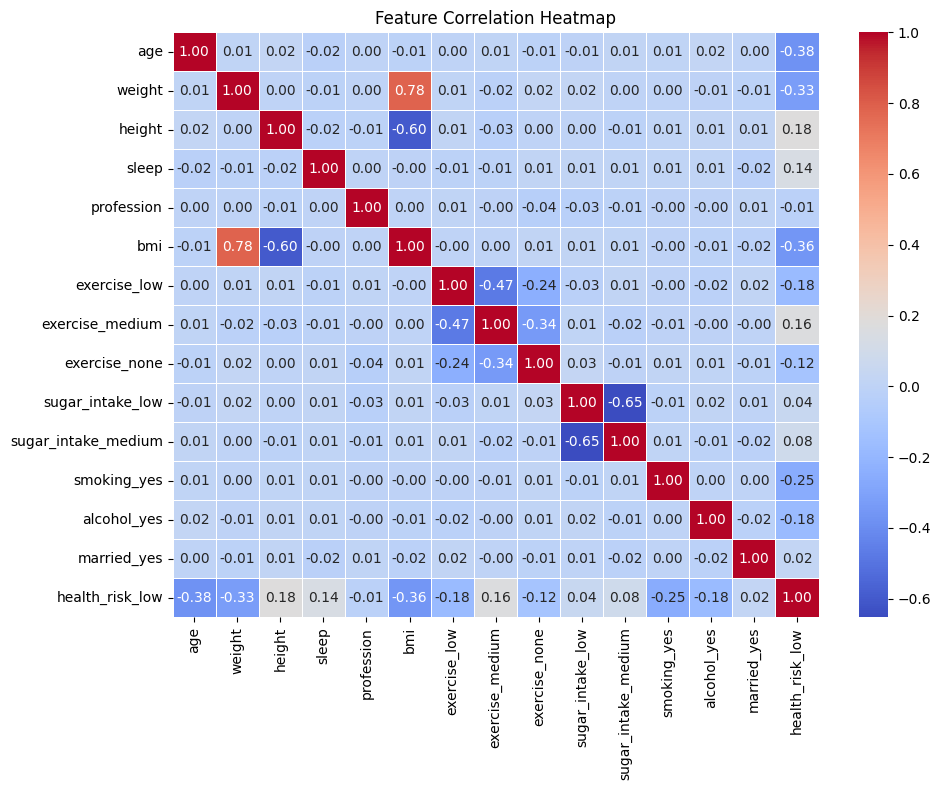

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [12]:
target = 'health_risk_low'
X = df.drop(columns=[target])
y = df[target]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)    
    results[name] = acc
    
    print(f"{name}: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression: 0.8910

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       698
           1       0.84      0.79      0.81       302

    accuracy                           0.89      1000
   macro avg       0.88      0.86      0.87      1000
weighted avg       0.89      0.89      0.89      1000

Random Forest: 0.9790

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       698
           1       0.95      0.98      0.97       302

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Gradient Boosting: 0.9910

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.98      0.99      0.99       302

    accuracy                   

In [15]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting']),
        ('lr', models['Logistic Regression']),
        ('Ada', models['AdaBoost']),
        ('SVM', models['SVM']),
        ('KNN', models['KNN'])
    ],
    voting='soft'   # 'hard' for majority vote, 'soft' for probability average
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.946


In [16]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

Best model: AdaBoost with accuracy 0.9990
